# **Remote Work's Effect on Social Isolation and Work-Life Balance**


### *Overall Findings*

Remote work does not have a significant impact on perceived social isolation or work-life balance when considered on average.
Of the three work arrangements (remote, hybrid, onsite), remote work was the most likely to produce extreme responses (either very positive or very negative).
These findings suggest that while the overall impact of remote work on social isolation and work-life balance may be minimal, individual experiences can vary greatly. Further research is needed to understand the individual factors contributing to these variations in response to remote work


In [53]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.patches as mpatches
import textwrap

In [54]:
#Create a path to the csv and put it into Pandas DataFrame
csv_path = Path("Resources/Impact_of_Remote_Work_on_Mental_Health.csv")
remote_work_mental_health_df = pd.read_csv(csv_path)

#Show Dataframe
remote_work_mental_health_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [55]:
#Filter Dataframe to only include Results from North America
filtered_df = remote_work_mental_health_df[remote_work_mental_health_df["Region"] == "North America"]

#Show Dataframe
filtered_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,Low,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America


In [56]:
#Create pivot table of social isolation response by work location
Social_Isolation_Rating_Counts = filtered_df.pivot_table(
    index="Work_Location",
    columns="Social_Isolation_Rating",
    aggfunc="size",
    fill_value=0
)

#Show Dataframe
Social_Isolation_Rating_Counts.head()

Social_Isolation_Rating,1,2,3,4,5
Work_Location,,,,,
Hybrid,47,55,56,58,45
Onsite,53,48,42,57,52
Remote,55,54,46,51,58


In [57]:
# Calculate mean, median, and mode of social isolation responces for each work location
statistics = filtered_df.groupby("Work_Location")["Social_Isolation_Rating"].agg(["mean", "std"])
statistics["mode"] = filtered_df.groupby("Work_Location")["Social_Isolation_Rating"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Round mean & std
statistics["mean"] = statistics["mean"].round(2)
statistics["std"] = statistics["std"].round(2)

#Show Dataframe
statistics.head()

,mean,std,mode
Work_Location,,,
Hybrid,3.00,1.36,4
Onsite,3.03,1.45,4
Remote,3.01,1.46,5


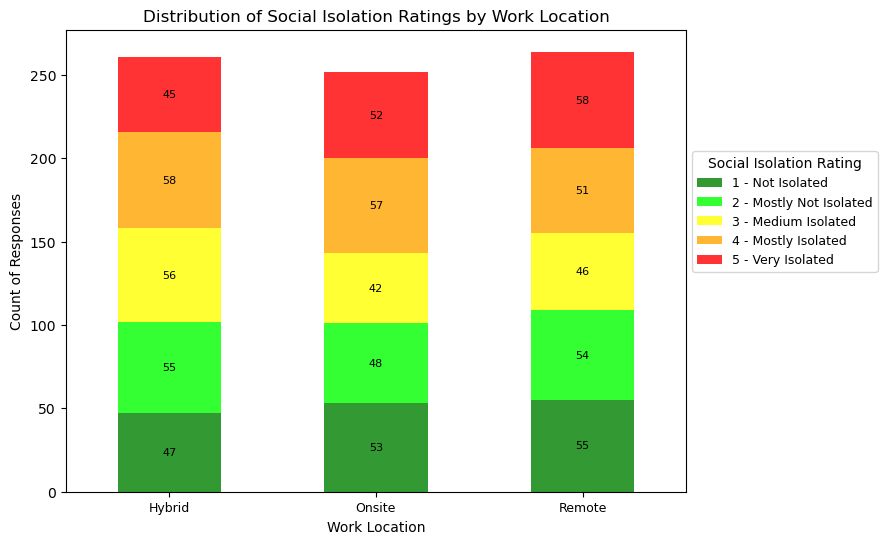

In [58]:
#Plot stacked bar graph for social isolation ranting by work location

#Create Labels for 1-5 Social Isolation Ratings
custom_labels = [
    "1 - Not Isolated", 
    "2 - Mostly Not Isolated", 
    "3 - Medium Isolated", 
    "4 - Mostly Isolated", 
    "5 - Very Isolated"
]

#Assign Colors for each part of stacked bars
colors = ["green", "lime", "yellow", "orange", "red"]

#Plot stacked bar chart (use bars as object to make it easier to place counts in segments)
bars = Social_Isolation_Rating_Counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    color=colors,
    alpha=0.8,
)

#Function to display the count of responces in each box of the bar chart
for i, location in enumerate(Social_Isolation_Rating_Counts.index):
    cumulative_height = 0  
    for rating, count in Social_Isolation_Rating_Counts.loc[location].items():  
        if count > 0:
            bars.text(
                x=i, 
                y=cumulative_height + count / 2,  
                s=str(count),  
                ha="center", 
                va="center", 
                fontsize=8, 
                color="black"  
            )
            cumulative_height += count 
        
#Customize the chart
bars.set_title("Distribution of Social Isolation Ratings by Work Location", fontsize=12)
bars.set_xlabel("Work Location", fontsize=10)
bars.set_ylabel("Count of Responses", fontsize=10)
bars.set_xticklabels(Social_Isolation_Rating_Counts.index, rotation=0, fontsize=9)


#Create a legend beside the chart
bars.legend(
    labels=custom_labels, 
    title="Social Isolation Rating", 
    fontsize=9, 
    title_fontsize=10, 
    loc="upper left", 
    bbox_to_anchor=(1, 0.75)
)

#Show stacked bar chart
plt.show()

# **Remote Work and Social Isolation**

Overall, remote work appears to have very little effect on how workers perceive their level of social isolation. Across all three work settings (remote, hybrid, and onsite), the mean variation was only 1%, indicating that, on average, remote work has minimal impact on whether a person feels more or less socially isolated.

However, in the remote work group, we observed the highest standard deviation among all three settings, suggesting it is the most likely work arrangement to produce results that deviate from the mean. This is further supported by remote work being the only setting with a mode of 5, meaning it had the most respondents who felt extremely socially isolated.

Key takeaway: While remote work typically has little effect on perceived social isolation overall, it is more likely than hybrid or onsite work to cause individuals to feel very socially isolated.

In [59]:
#Group the data by Work Location and get the count of each Work-Life Balance Rating (1-5)
work_locations = ["Onsite", "Hybrid", "Remote"]
Work_Life_Balance_Rating_Counts = {}

#Get the counts of each rating (1-5) for the current work location
for location in work_locations:
    Work_Life_Balance_Rating_Counts[location] = filtered_df[filtered_df["Work_Location"] == location]["Work_Life_Balance_Rating"].value_counts().sort_index()

#Show counts to verify correct data
Work_Life_Balance_Rating_Counts

{'Onsite': Work_Life_Balance_Rating
 1    41
 2    56
 3    61
 4    46
 5    48
 Name: count, dtype: int64,
 'Hybrid': Work_Life_Balance_Rating
 1    52
 2    44
 3    62
 4    52
 5    51
 Name: count, dtype: int64,
 'Remote': Work_Life_Balance_Rating
 1    61
 2    60
 3    41
 4    55
 5    47
 Name: count, dtype: int64}

In [60]:
#Calculate mean, std, and mode of Work Life Balance responces for each work location
statistics2 = filtered_df.groupby("Work_Location")["Work_Life_Balance_Rating"].agg(["mean", "std"])
statistics2["mode"] = filtered_df.groupby("Work_Location")["Work_Life_Balance_Rating"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

#Round mean & std
statistics2["mean"] = statistics2["mean"].round(2)
statistics2["std"] = statistics2["std"].round(2)

statistics2.head()

,mean,std,mode
Work_Location,,,
Hybrid,3.02,1.40,3
Onsite,3.02,1.35,3
Remote,2.88,1.44,1


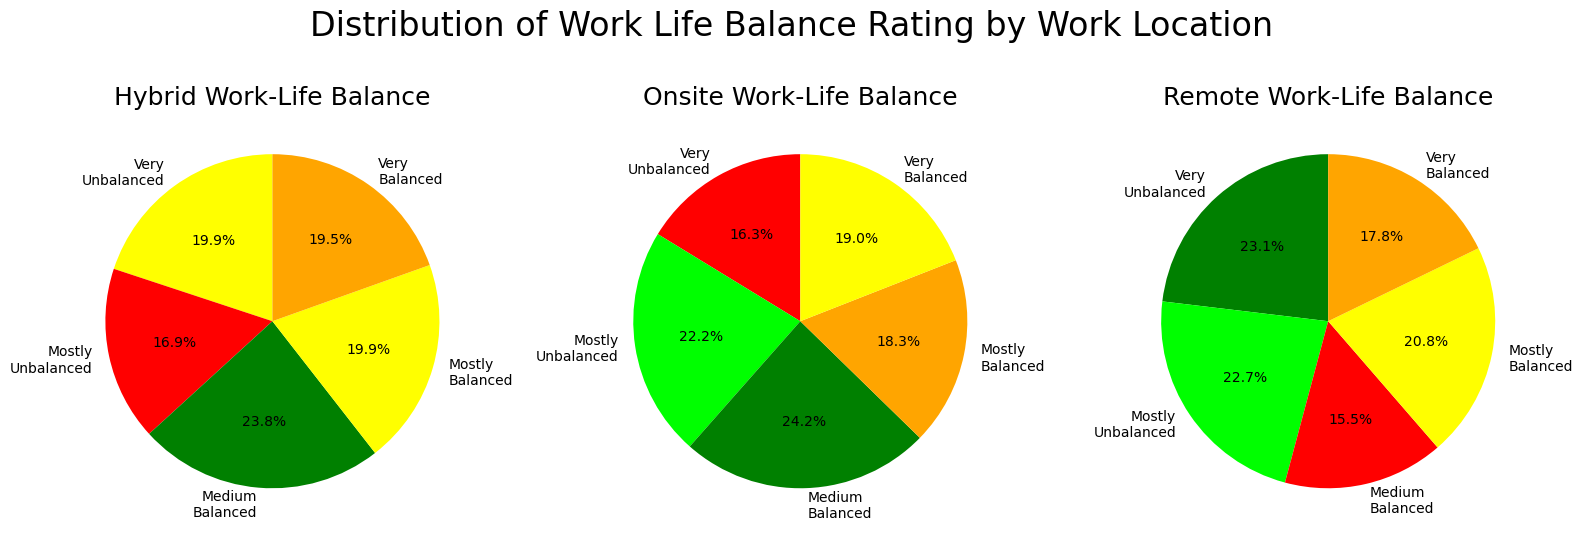

In [61]:
#Create 3 side by side pie charts, 1 for each location, based on work life balance ratings

#Create labels for 1-5 Work Life Balance Ratings
labels = {
    1: "Very Unbalanced",
    2: "Mostly Unbalanced",
    3: "Medium Balanced",
    4: "Mostly Balanced",
    5: "Very Balanced"
}

#Function to wrap text so it does not overlap
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

#Function to generate a color map based on percentages
def get_color_map(percentages):   
    
    #Sort percentages in descending order
    sorted_percentages = sorted(percentages, reverse=True) 
    
    #Assign colors based on highest to lowest percentage 
    color_map = ["green", "lime", "yellow", "orange", "red"]   
    
    #Assign color based on sorted percentages
    color_mapping = {}
    for idx, percentage in enumerate(sorted_percentages):
        color_mapping[percentage] = color_map[idx]  
        
    #Ensure the original percentage order is maintained(used to fix issue of colors being random)
    sorted_colors = [color_mapping[percentage] for percentage in percentages]
    
    return sorted_colors

#Increase the size of the 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  

#Set up Data for charting - Group the data by location, break the data into percentages for each location by rating, assign color scale  

#Get all unique values by location 
work_locations = filtered_df["Work_Location"].unique()  

#Start to loop thorugh data
for i, location in enumerate(work_locations):
    
    #Filter the data for the current work location
    location_data = filtered_df[filtered_df["Work_Location"] == location]["Work_Life_Balance_Rating"]
    
    #Count ratings (1-5) based on location
    rating_counts = location_data.value_counts().sort_index()
    
    #Calculate percentages
    percentages = rating_counts / rating_counts.sum() * 100

    #Assign colors based on percentages
    colors = get_color_map(percentages)
    
    #Change ratings 1-5 to labels and wrap the text to better fit and not overlap
    rating_labels = [labels[i] for i in rating_counts.index]
    wrapped_labels = wrap_labels(rating_labels, width=10)  
    
#Plot the pie chart
    plt.subplot(1, 3, i+1) 
    plt.pie(
        percentages,
        labels=wrapped_labels,  
        colors=colors,
        autopct="%1.1f%%",
        startangle=90,
)

    #Set the title for the pie chart
    plt.title(f"{location} Work-Life Balance", fontsize=18)  

#Add Title for entire chart
plt.suptitle("Distribution of Work Life Balance Rating by Work Location", fontsize=24)  

#Adjust layout to prevent text overlap and print chart
plt.tight_layout()
plt.show()

# **Remote Work and Work-Life Balance**

Similar to social isolation, remote work seems to have little effect on perceived work-life balance. Across the three types of work, the mean variation was only 4.75%, suggesting that remote work, compared to hybrid or onsite arrangements, has minimal impact on work-life balance when considering a large sample size.

However, remote work also had the highest standard deviation in this area. Notably, the mode for remote workers was 1, indicating that a significant number of respondents felt their work-life balance was very unbalanced.

Key takeaway: On average, remote work does not significantly affect perceived work-life balance. However, it is more likely to result in individuals experiencing extreme work-life imbalance compared to other work arrangements.